# 1. Individual stock return data preprocessing

In [3]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from functools import reduce

In [5]:
os.chdir('/Users/sharry/Downloads/Daily Stock Price Returns') 

df01 = pd.read_excel("TRD_Dalyr.xlsx", skiprows=[0, 2])
df02 = pd.read_excel("TRD_Dalyr1.xlsx", skiprows=[0, 2])
df03 = pd.read_excel("TRD_Dalyr2.xlsx", skiprows=[0, 2])
df04 = pd.read_excel("TRD_Dalyr3.xlsx", skiprows=[0, 2])
df05 = pd.read_excel("TRD_Dalyr4.xlsx", skiprows=[0, 2])
df06 = pd.read_excel("TRD_Dalyr5.xlsx", skiprows=[0, 2])
df07 = pd.read_excel("TRD_Dalyr6.xlsx", skiprows=[0, 2])
df08 = pd.read_excel("TRD_Dalyr7.xlsx", skiprows=[0, 2])
df09 = pd.read_excel("TRD_Dalyr8.xlsx", skiprows=[0, 2])

df1 = pd.concat([df01, df02, df03, df04, df05, df06, df07, df08, df09], ignore_index=True)

/Users/sharry/miniconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/sharry/miniconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/sharry/miniconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/sharry/miniconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/sharry/miniconda3/lib/python3.11/site-packages/openpyxl/s

In [6]:
df1

,Stock Code,Trading Date,Daily Return Without Cash Dividend
0,1,2016-01-04,-0.055046
1,1,2016-01-05,0.006178
2,1,2016-01-06,0.011404
3,1,2016-01-07,-0.051171
4,1,2016-01-08,0.016453
...,...,...,...
7538905,873833,2023-12-25,0.038771
7538906,873833,2023-12-26,-0.009155
7538907,873833,2023-12-27,0.018479
7538908,873833,2023-12-28,0.034194


In [7]:
df2 = df1.copy()

df2['Trading Date'] = pd.to_datetime(df2['Trading Date'])
df2['Trading Date'] = df2['Trading Date'].dt.strftime('%d%b%Y').str.lower()

In [9]:
df2.columns = ['Stock Code', 'Trading Date ymd', 'Stock Return']

df2

,Stock Code,Trading Date ymd,Stock Return
0,1,04jan2016,-0.055046
1,1,05jan2016,0.006178
2,1,06jan2016,0.011404
3,1,07jan2016,-0.051171
4,1,08jan2016,0.016453
...,...,...,...
7538905,873833,25dec2023,0.038771
7538906,873833,26dec2023,-0.009155
7538907,873833,27dec2023,0.018479
7538908,873833,28dec2023,0.034194


# 2. Market return data preprocessing

In [10]:
df3 = pd.read_excel('/Users/sharry/Downloads/Daily Market Returns/TRD_Dalym.xlsx', skiprows=[0, 2])

/Users/sharry/miniconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [11]:
df3 = df3[df3['Market Type'] == 1]

In [13]:
df3['Trading Date'] = pd.to_datetime(df3['Trading Date'])
df3['Trading Date'] = df3['Trading Date'].dt.strftime('%d%b%Y').str.lower()

df3 = df3.drop(columns=['Market Type'])

df3.columns = ['Trading Date ymd', 'Market Return']

df3

,Trading Date ymd,Market Return
4,04jan2016,-0.087405
9,05jan2016,-0.012811
14,06jan2016,0.031834
19,07jan2016,-0.090405
24,08jan2016,0.016966
...,...,...
11609,25dec2023,-0.004500
11615,26dec2023,-0.009787
11623,27dec2023,0.007200
11629,28dec2023,0.015103


# 3. EPS data preprocessing

In [17]:
df4 = pd.read_excel('/Users/sharry/Downloads/Index per Share/FI_T9.xlsx', skiprows=[0, 2])

/Users/sharry/miniconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [18]:
df4 = df4[df4['Code for Statement Type'] == 'A']

In [19]:
df4 = df4[~df4['Stock Short Name'].str.startswith(('ST', 'PT'))]

In [20]:
df4 = df4[~df4['Industry Code'].str.startswith(('J'))]

In [21]:
df4['Ending Date of Statistics'] = pd.to_datetime(df4['Ending Date of Statistics'])

df4 = df4[~df4['Ending Date of Statistics'].dt.month.isin([3, 9])]

def convert_to_half_year(date):
    if date.month == 6:
        return f"{date.year}h1"
    elif date.month == 12:
        return f"{date.year}h2"

df4['Ending Date of Statistics'] = df4['Ending Date of Statistics'].apply(convert_to_half_year)

In [22]:
df4

,Stock Code,Stock Short Name,Ending Date of Statistics,Code for Statement Type,Industry Code,Earnings per Share 1
48,2,WKA,2014h1,A,K70,0.498635
52,2,WKA,2014h2,A,K70,1.747453
56,2,WKA,2015h1,A,K70,0.614541
60,2,WKA,2015h2,A,K70,2.348023
64,2,WKA,2016h1,A,K70,0.642679
...,...,...,...,...,...,...
271066,873806,YXY,2021h2,A,I65,0.565405
271068,873806,YXY,2022h1,A,I65,0.259645
271070,873806,YXY,2022h2,A,I65,0.470796
271072,873833,MXYS,2022h1,A,C34,0.360066


In [23]:
df5 = df4.copy()

df5 = df5.drop(columns=['Stock Short Name', 'Code for Statement Type', 'Industry Code'])

df5.columns = ['Stock Code', 'Ending Date yh', 'EPS']

In [24]:
def process_group(group):
    
    group['is_h2'] = group['Ending Date yh'].str.endswith('h2')
    group['H1 EPS'] = group['EPS'].shift(1)
    group.loc[~group['is_h2'], 'H1 EPS'] = None
    group.drop(columns='is_h2', inplace=True)
    return group

df5 = df5.groupby('Stock Code').apply(process_group)

df5.reset_index(drop=True, inplace=True)

df5

/var/folders/bm/sthpkgp95hz4cn3v97qms_zw0000gn/T/ipykernel_1420/4160119861.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df5 = df5.groupby('Stock Code').apply(process_group)


,Stock Code,Ending Date yh,EPS,H1 EPS
0,2,2014h1,0.498635,NaN
1,2,2014h2,1.747453,0.498635
2,2,2015h1,0.614541,NaN
3,2,2015h2,2.348023,0.614541
4,2,2016h1,0.642679,NaN
...,...,...,...,...
74605,873806,2021h2,0.565405,NaN
74606,873806,2022h1,0.259645,NaN
74607,873806,2022h2,0.470796,0.259645
74608,873833,2022h1,0.360066,NaN


In [25]:
df5['EPS'] = np.where(df5['Ending Date yh'].str.endswith('h2'), df5['EPS'] - df5['H1 EPS'], df5['EPS'])

df5 = df5.drop(columns=['H1 EPS'])

df5['Previous EPS'] = df5.groupby('Stock Code')['EPS'].shift(2)
df5['UE'] = df5['EPS'] - df5['Previous EPS']

df5.dropna(subset=['UE'], inplace=True)

df5['std_dev_UE'] = df5.groupby('Stock Code')['UE'].transform(lambda x: x.rolling(window=4, min_periods=1).std())
df5['SUE'] = df5['UE'] / df5['std_dev_UE']

df5 = df5[~df5['Ending Date yh'].str.startswith(('2014', '2015'))]

df5.dropna(subset=['SUE'], inplace=True)

def assign_deciles(group):
    group['SUE_Decile'] = pd.qcut(group['SUE'], 10, labels=False)
    return group

df5 = df5.groupby('Ending Date yh').apply(assign_deciles)
df5 = df5.reset_index(drop=True)

df5

/var/folders/bm/sthpkgp95hz4cn3v97qms_zw0000gn/T/ipykernel_1420/2151459849.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df5 = df5.groupby('Ending Date yh').apply(assign_deciles)


,Stock Code,Ending Date yh,EPS,Previous EPS,UE,std_dev_UE,SUE,SUE_Decile
0,2,2016h1,0.642679,0.614541,0.028138,0.242247,0.116154,5
1,4,2016h1,0.035634,0.052522,-0.016888,0.162438,-0.103966,4
2,5,2016h1,0.124099,-0.025361,0.149460,0.125627,1.189715,8
3,6,2016h1,0.078541,0.198801,-0.120260,0.197462,-0.609029,2
4,7,2016h1,0.074446,-0.042073,0.116519,0.116805,0.997552,8
...,...,...,...,...,...,...,...,...
53312,873339,2022h2,0.254471,-0.672166,0.926637,0.865190,1.071022,8
53313,873527,2022h2,0.233178,0.488596,-0.255418,0.239023,-1.068594,2
53314,873570,2022h2,0.888261,0.229975,0.658286,0.376280,1.749459,9
53315,873576,2022h2,0.310366,0.276992,0.033374,0.173292,0.192588,5


In [26]:
df6 = df5.copy()

df6 = df6.drop(columns=['EPS', 'Previous EPS', 'UE', 'std_dev_UE', 'SUE'])

df6

,Stock Code,Ending Date yh,SUE_Decile
0,2,2016h1,5
1,4,2016h1,4
2,5,2016h1,8
3,6,2016h1,2
4,7,2016h1,8
...,...,...,...
53312,873339,2022h2,8
53313,873527,2022h2,2
53314,873570,2022h2,9
53315,873576,2022h2,5


In [27]:
df7 = df6.pivot(index='Stock Code', columns='Ending Date yh', values='SUE_Decile')

df7.columns = ['SUE Decile ' + str(col) for col in df7.columns]

df7.reset_index(inplace=True)

df7

,Stock Code,SUE Decile 2016h1,SUE Decile 2016h2,SUE Decile 2017h1,SUE Decile 2017h2,SUE Decile 2018h1,SUE Decile 2018h2,SUE Decile 2019h1,SUE Decile 2019h2,SUE Decile 2020h1,SUE Decile 2020h2,SUE Decile 2021h1,SUE Decile 2021h2,SUE Decile 2022h1,SUE Decile 2022h2
0,2,5.0,7.0,9.0,9.0,9.0,9.0,9.0,4.0,4.0,6.0,0.0,0.0,6.0,4.0
1,4,4.0,8.0,2.0,1.0,6.0,1.0,3.0,7.0,7.0,8.0,4.0,0.0,NaN,NaN
2,5,8.0,4.0,0.0,5.0,6.0,7.0,9.0,3.0,2.0,0.0,NaN,NaN,NaN,NaN
3,6,2.0,8.0,6.0,2.0,7.0,3.0,0.0,6.0,6.0,4.0,9.0,0.0,2.0,5.0
4,7,8.0,9.0,2.0,1.0,2.0,0.0,5.0,8.0,4.0,2.0,4.0,8.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5172,873339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,8.0
5173,873527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5174,873570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
5175,873576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


# 4. Announcement data preprocessing

In [29]:
df8 = pd.read_excel('/Users/sharry/Downloads/Statements Release Dates/IAR_Rept.xlsx', skiprows=[0, 2])

/Users/sharry/miniconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [30]:
df8['Ending Date of Statistics'] = pd.to_datetime(df8['Ending Date of Statistics'])
df8['Announcement Date'] = pd.to_datetime(df8['Announcement Date'])

df8 = df8[df8['Report Type'].isin([2, 4])]

df8['Announcement Date'] = df8['Announcement Date'].dt.strftime('%d%b%Y').str.lower()
df8 = df8[~df8['Ending Date of Statistics'].dt.month.isin([3, 9])]
df8['Ending Date of Statistics'] = df8['Ending Date of Statistics'].apply(
    lambda x: str(x.year) + 'h1' if x.month == 6 else str(x.year) + 'h2'
)

df8 = df8.drop(columns=['Stock Acronym', 'Report Type'])

df8.columns = ['Stock Code', 'Ending Date yh', 'Announcement Date']

df8

,Stock Code,Ending Date yh,Announcement Date
1,1,2016h1,12aug2016
3,1,2016h2,17mar2017
5,1,2017h1,11aug2017
7,1,2017h2,15mar2018
9,1,2018h1,16aug2018
...,...,...,...
111088,873806,2021h2,NaN
111089,873806,2022h1,NaN
111090,873806,2022h2,NaN
111091,873833,2022h1,NaN


In [31]:
df9 = df8.copy()

df9 = df9.pivot(index='Stock Code', columns='Ending Date yh', values='Announcement Date')

df9.columns = ['Ann Date ' + str(col) for col in df9.columns]

df9.reset_index(inplace=True)

df9

,Stock Code,Ann Date 2016h1,Ann Date 2016h2,Ann Date 2017h1,Ann Date 2017h2,Ann Date 2018h1,Ann Date 2018h2,Ann Date 2019h1,Ann Date 2019h2,Ann Date 2020h1,Ann Date 2020h2,Ann Date 2021h1,Ann Date 2021h2,Ann Date 2022h1,Ann Date 2022h2
0,1,12aug2016,17mar2017,11aug2017,15mar2018,16aug2018,07mar2019,08aug2019,14feb2020,28aug2020,02feb2021,20aug2021,10mar2022,18aug2022,09mar2023
1,2,22aug2016,27mar2017,25aug2017,27mar2018,21aug2018,26mar2019,21aug2019,18mar2020,28aug2020,31mar2021,30aug2021,31mar2022,31aug2022,31mar2023
2,4,31aug2016,11apr2017,31aug2017,28apr2018,25aug2018,26apr2019,31aug2019,28apr2020,31aug2020,28apr2021,27aug2021,30apr2022,25aug2022,29apr2023
3,5,25aug2016,27apr2017,26aug2017,21apr2018,30aug2018,25apr2019,29aug2019,23may2020,29aug2020,30apr2021,27aug2021,27apr2022,27aug2022,29apr2023
4,6,19aug2016,30mar2017,18aug2017,30mar2018,17aug2018,30mar2019,16aug2019,09apr2020,28aug2020,31mar2021,27aug2021,16apr2022,25aug2022,28apr2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,873703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5302,873706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5303,873726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5304,873806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 5. Data merging

In [32]:
merged_df1 = pd.merge(df2, df3, on=['Trading Date ymd'], how='left')

merged_df1

,Stock Code,Trading Date ymd,Stock Return,Market Return
0,1,04jan2016,-0.055046,-0.087405
1,1,05jan2016,0.006178,-0.012811
2,1,06jan2016,0.011404,0.031834
3,1,07jan2016,-0.051171,-0.090405
4,1,08jan2016,0.016453,0.016966
...,...,...,...,...
7538905,873833,25dec2023,0.038771,-0.004500
7538906,873833,26dec2023,-0.009155,-0.009787
7538907,873833,27dec2023,0.018479,0.007200
7538908,873833,28dec2023,0.034194,0.015103


In [33]:
merged_df2 = pd.merge(merged_df1, df7, on=['Stock Code'], how='left')

stock_codes_list = df7['Stock Code'].tolist()
merged_df2 = merged_df2[merged_df2['Stock Code'].isin(stock_codes_list)]

merged_df2

,Stock Code,Trading Date ymd,Stock Return,Market Return,SUE Decile 2016h1,SUE Decile 2016h2,SUE Decile 2017h1,SUE Decile 2017h2,SUE Decile 2018h1,SUE Decile 2018h2,SUE Decile 2019h1,SUE Decile 2019h2,SUE Decile 2020h1,SUE Decile 2020h2,SUE Decile 2021h1,SUE Decile 2021h2,SUE Decile 2022h1,SUE Decile 2022h2
1218,2,04jul2016,-0.099877,0.022721,5.0,7.0,9.0,9.0,9.0,9.0,9.0,4.0,4.0,6.0,0.0,0.0,6.0,4.0
1219,2,05jul2016,-0.100045,0.009576,5.0,7.0,9.0,9.0,9.0,9.0,9.0,4.0,4.0,6.0,0.0,0.0,6.0,4.0
1220,2,06jul2016,0.000505,0.008418,5.0,7.0,9.0,9.0,9.0,9.0,9.0,4.0,4.0,6.0,0.0,0.0,6.0,4.0
1221,2,07jul2016,-0.049495,0.002856,5.0,7.0,9.0,9.0,9.0,9.0,9.0,4.0,4.0,6.0,0.0,0.0,6.0,4.0
1222,2,08jul2016,-0.003719,-0.003644,5.0,7.0,9.0,9.0,9.0,9.0,9.0,4.0,4.0,6.0,0.0,0.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7538651,873593,25dec2023,0.018418,-0.004500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
7538652,873593,26dec2023,-0.029547,-0.009787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
7538653,873593,27dec2023,-0.033333,0.007200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
7538654,873593,28dec2023,0.004073,0.015103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [34]:
merged_df3 = pd.merge(merged_df2, df9, on=['Stock Code'], how='left')

merged_df3

,Stock Code,Trading Date ymd,Stock Return,Market Return,SUE Decile 2016h1,SUE Decile 2016h2,SUE Decile 2017h1,SUE Decile 2017h2,SUE Decile 2018h1,SUE Decile 2018h2,...,Ann Date 2018h1,Ann Date 2018h2,Ann Date 2019h1,Ann Date 2019h2,Ann Date 2020h1,Ann Date 2020h2,Ann Date 2021h1,Ann Date 2021h2,Ann Date 2022h1,Ann Date 2022h2
0,2,04jul2016,-0.099877,0.022721,5.0,7.0,9.0,9.0,9.0,9.0,...,21aug2018,26mar2019,21aug2019,18mar2020,28aug2020,31mar2021,30aug2021,31mar2022,31aug2022,31mar2023
1,2,05jul2016,-0.100045,0.009576,5.0,7.0,9.0,9.0,9.0,9.0,...,21aug2018,26mar2019,21aug2019,18mar2020,28aug2020,31mar2021,30aug2021,31mar2022,31aug2022,31mar2023
2,2,06jul2016,0.000505,0.008418,5.0,7.0,9.0,9.0,9.0,9.0,...,21aug2018,26mar2019,21aug2019,18mar2020,28aug2020,31mar2021,30aug2021,31mar2022,31aug2022,31mar2023
3,2,07jul2016,-0.049495,0.002856,5.0,7.0,9.0,9.0,9.0,9.0,...,21aug2018,26mar2019,21aug2019,18mar2020,28aug2020,31mar2021,30aug2021,31mar2022,31aug2022,31mar2023
4,2,08jul2016,-0.003719,-0.003644,5.0,7.0,9.0,9.0,9.0,9.0,...,21aug2018,26mar2019,21aug2019,18mar2020,28aug2020,31mar2021,30aug2021,31mar2022,31aug2022,31mar2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7319479,873593,25dec2023,0.018418,-0.004500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17mar2023
7319480,873593,26dec2023,-0.029547,-0.009787,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17mar2023
7319481,873593,27dec2023,-0.033333,0.007200,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17mar2023
7319482,873593,28dec2023,0.004073,0.015103,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17mar2023


# 6. Event study

In [35]:
df10 = merged_df3.copy()

df10['Stock AB Return'] = df10['Stock Return'] - df10['Market Return']
df10 = df10.drop(columns=['Stock Return', 'Market Return'])

# df10 = df10.dropna()

df10

,Stock Code,Trading Date ymd,SUE Decile 2016h1,SUE Decile 2016h2,SUE Decile 2017h1,SUE Decile 2017h2,SUE Decile 2018h1,SUE Decile 2018h2,SUE Decile 2019h1,SUE Decile 2019h2,...,Ann Date 2018h2,Ann Date 2019h1,Ann Date 2019h2,Ann Date 2020h1,Ann Date 2020h2,Ann Date 2021h1,Ann Date 2021h2,Ann Date 2022h1,Ann Date 2022h2,Stock AB Return
0,2,04jul2016,5.0,7.0,9.0,9.0,9.0,9.0,9.0,4.0,...,26mar2019,21aug2019,18mar2020,28aug2020,31mar2021,30aug2021,31mar2022,31aug2022,31mar2023,-0.122598
1,2,05jul2016,5.0,7.0,9.0,9.0,9.0,9.0,9.0,4.0,...,26mar2019,21aug2019,18mar2020,28aug2020,31mar2021,30aug2021,31mar2022,31aug2022,31mar2023,-0.109621
2,2,06jul2016,5.0,7.0,9.0,9.0,9.0,9.0,9.0,4.0,...,26mar2019,21aug2019,18mar2020,28aug2020,31mar2021,30aug2021,31mar2022,31aug2022,31mar2023,-0.007913
3,2,07jul2016,5.0,7.0,9.0,9.0,9.0,9.0,9.0,4.0,...,26mar2019,21aug2019,18mar2020,28aug2020,31mar2021,30aug2021,31mar2022,31aug2022,31mar2023,-0.052351
4,2,08jul2016,5.0,7.0,9.0,9.0,9.0,9.0,9.0,4.0,...,26mar2019,21aug2019,18mar2020,28aug2020,31mar2021,30aug2021,31mar2022,31aug2022,31mar2023,-0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7319479,873593,25dec2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17mar2023,0.022918
7319480,873593,26dec2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17mar2023,-0.019760
7319481,873593,27dec2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17mar2023,-0.040533
7319482,873593,28dec2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17mar2023,-0.011030


In [36]:
years = range(2016, 2023)
halfs = ['h1', 'h2']

datasets = {}

for year in years:
    for half in halfs:
        sue_col = f'SUE Decile {year}{half}'
        ann_col = f'Ann Date {year}{half}'
        df_key = f'df{year}{half}'
        datasets[df_key] = df10[['Stock Code', 'Trading Date ymd', 'Stock AB Return', sue_col, ann_col]].copy()
        
        datasets[df_key] = datasets[df_key].dropna()
        
        # 计算Abs Days
        
        datasets[df_key]['Trading Date ymd'] = pd.to_datetime(datasets[df_key]['Trading Date ymd'], format='%d%b%Y')
        datasets[df_key][ann_col] = pd.to_datetime(datasets[df_key][ann_col], format='%d%b%Y')
        
        datasets[df_key]['Abs Days'] = (datasets[df_key]['Trading Date ymd'] - datasets[df_key][ann_col]).abs()         
        datasets[df_key]['Row Number'] = datasets[df_key].groupby('Stock Code').cumcount() + 1
        
        # 计算Event Date
        
        min_row_indices = datasets[df_key].groupby('Stock Code')['Abs Days'].idxmin()
        
        result = datasets[df_key].loc[min_row_indices, 'Row Number']

        result_map = datasets[df_key].loc[min_row_indices, ['Stock Code', 'Row Number']].set_index('Stock Code')['Row Number']

        datasets[df_key]['Row Star'] = datasets[df_key]['Stock Code'].map(result_map)
        
        datasets[df_key]['Event Date'] = datasets[df_key]['Row Number'] - datasets[df_key]['Row Star']
        
        # 筛选Event Window
        
        datasets[df_key] = datasets[df_key][datasets[df_key]['Event Date'].between(-60, 60)]
        
        datasets[df_key] = datasets[df_key].sort_values(by=['Stock Code', 'Event Date'])
        
        datasets[df_key] = datasets[df_key].drop(columns=['Trading Date ymd', ann_col, 'Abs Days', 'Row Number', 'Row Star'])
        
        # Python 中的 bys event_date sue_decile_112: egen portfolio_ab_ret_112 = mean(ab_ret)
        
        mean = datasets[df_key].groupby(['Event Date', sue_col])['Stock AB Return'].mean().reset_index()
        
        datasets[df_key] = datasets[df_key].merge(mean, on=['Event Date', sue_col], how='left')
        
        datasets[df_key].rename(columns={'Stock AB Return_y': f'Portfolio AB Return {year}{half}'}, inplace=True)
        datasets[df_key].rename(columns={'Stock AB Return_x': 'Stock AB Return'}, inplace=True)
        
        # Python 中的 bys event_date sue_decile_112: gen dup = cond(_N==1,0,_n)
        #            drop if dup > 1
        #            drop dup
        
        datasets[df_key] = datasets[df_key].drop_duplicates(subset=['Event Date', sue_col], keep='first')
        
        datasets[df_key] = datasets[df_key].drop(columns=['Stock Code', 'Stock AB Return'])
        
        datasets[df_key] = datasets[df_key].sort_values(by=[sue_col, 'Event Date'])
        
        datasets[df_key][f'Portfolio Car {year}{half}'] = datasets[df_key].groupby(sue_col)[f'Portfolio AB Return {year}{half}'].cumsum()
        
        datasets[df_key] = datasets[df_key].drop(columns=[f'Portfolio AB Return {year}{half}'])
        
        datasets[df_key].rename(columns={f'SUE Decile {year}{half}': 'SUE Decile'}, inplace=True)
        
datasets['df2016h1']

,SUE Decile,Event Date,Portfolio Car 2016h1
1150,0.0,-60,0.001972
1151,0.0,-59,-0.001014
1152,0.0,-58,-0.001610
1153,0.0,-57,-0.002359
1154,0.0,-56,-0.004461
...,...,...,...
2597,9.0,56,-0.055304
2598,9.0,57,-0.057301
2599,9.0,58,-0.058425
2600,9.0,59,-0.058669


In [37]:
data_frames = list(datasets.values())

merged_df4 = reduce(lambda left, right: pd.merge(left, right, on=['SUE Decile', 'Event Date'], how='outer'), data_frames)

merged_df4

,SUE Decile,Event Date,Portfolio Car 2016h1,Portfolio Car 2016h2,Portfolio Car 2017h1,Portfolio Car 2017h2,Portfolio Car 2018h1,Portfolio Car 2018h2,Portfolio Car 2019h1,Portfolio Car 2019h2,Portfolio Car 2020h1,Portfolio Car 2020h2,Portfolio Car 2021h1,Portfolio Car 2021h2,Portfolio Car 2022h1,Portfolio Car 2022h2
0,0.0,-60,0.001972,-0.002740,0.000155,-0.000744,-0.000221,-0.003380,0.000947,-0.003314,0.001343,-0.002096,0.001267,-0.001856,0.001387,0.003051
1,0.0,-59,-0.001014,-0.006184,0.002958,-0.000103,-0.002456,-0.011797,0.002038,-0.003708,0.002567,-0.003642,0.001375,-0.007444,0.004888,0.005534
2,0.0,-58,-0.001610,-0.008387,0.004172,-0.001351,-0.005026,-0.020564,0.002088,-0.000655,0.003944,-0.008935,-0.001208,-0.007823,0.001792,0.009304
3,0.0,-57,-0.002359,-0.010024,0.002809,-0.001583,-0.005756,-0.034980,0.002388,-0.000777,0.002503,-0.015946,-0.002875,-0.011429,0.000140,0.012092
4,0.0,-56,-0.004461,-0.011196,0.000379,-0.005338,-0.006280,-0.042978,0.003511,0.001245,0.002571,-0.023314,-0.003283,-0.015666,-0.000855,0.014839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,9.0,56,-0.055304,-0.067219,-0.033970,0.087781,0.019000,0.055301,0.089219,0.143070,0.082528,0.158853,0.101392,0.016014,0.057165,0.020264
1206,9.0,57,-0.057301,-0.067052,-0.034365,0.088803,0.018793,0.055693,0.088082,0.143530,0.078687,0.161489,0.101034,0.015807,0.054230,0.020465
1207,9.0,58,-0.058425,-0.070576,-0.035379,0.089247,0.017099,0.057221,0.088734,0.141328,0.078434,0.160359,0.102871,0.016123,0.052434,0.017830
1208,9.0,59,-0.058669,-0.069417,-0.036601,0.088340,0.016938,0.057837,0.088865,0.140095,0.076731,0.160523,0.107643,0.017059,0.049379,0.014324


In [38]:
df11 = merged_df4.copy()

columns_to_average = [
    'Portfolio Car 2016h1', 'Portfolio Car 2016h2', 
    'Portfolio Car 2017h1', 'Portfolio Car 2017h2',
    'Portfolio Car 2018h1', 'Portfolio Car 2018h2',
    'Portfolio Car 2019h1', 'Portfolio Car 2019h2',
    'Portfolio Car 2020h1', 'Portfolio Car 2020h2',
    'Portfolio Car 2021h1', 'Portfolio Car 2021h2',
    'Portfolio Car 2022h1', 'Portfolio Car 2022h2'
]

df11['Mean'] = df11[columns_to_average].mean(axis=1)

df11 = df11.drop(columns=columns_to_average)

df11

,SUE Decile,Event Date,Mean
0,0.0,-60,-0.000302
1,0.0,-59,-0.001213
2,0.0,-58,-0.002447
3,0.0,-57,-0.004700
4,0.0,-56,-0.006488
...,...,...,...
1205,9.0,56,0.048150
1206,9.0,57,0.047707
1207,9.0,58,0.046950
1208,9.0,59,0.046646


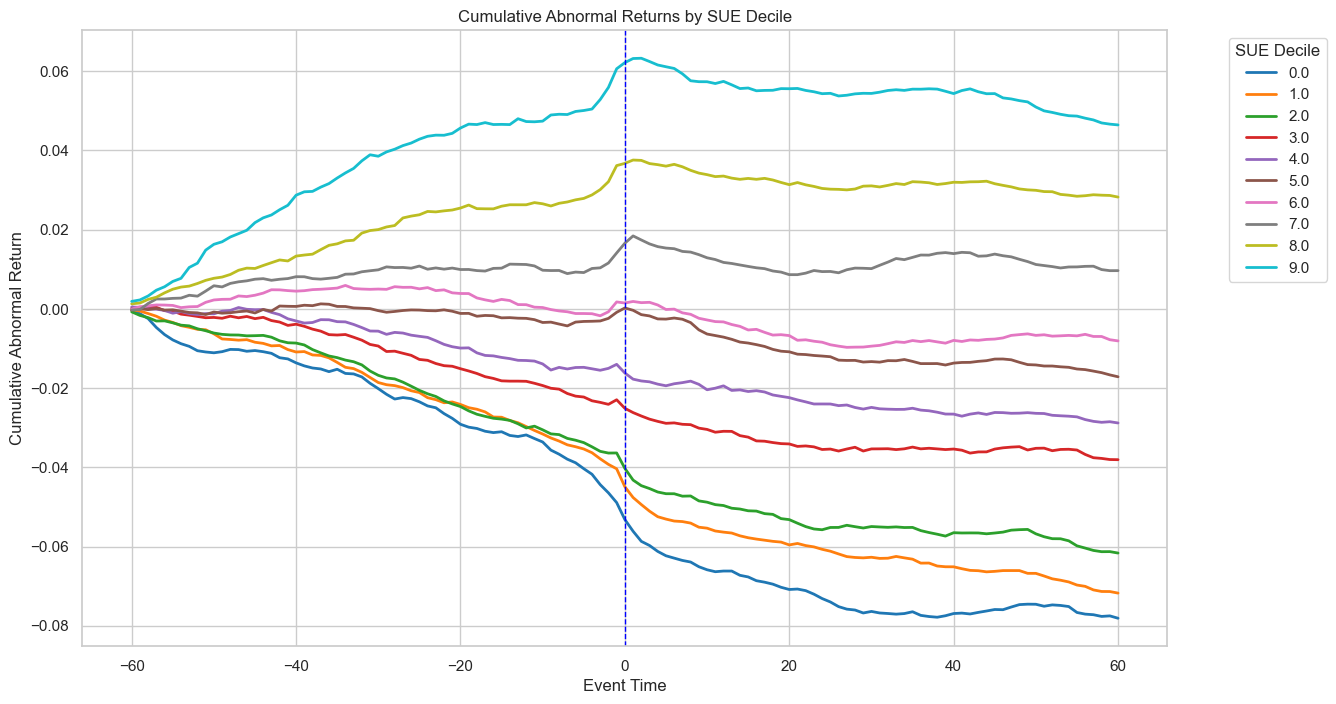

In [39]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

sns.lineplot(data=df11, x='Event Date', y='Mean', hue='SUE Decile', palette='tab10', linewidth=2)

plt.axvline(x=0, color='blue', linestyle='--', linewidth=1)

plt.legend(title='SUE Decile', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Event Time')
plt.ylabel('Cumulative Abnormal Return')
plt.title('Cumulative Abnormal Returns by SUE Decile')

plt.show()